### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap
sns.set_context('notebook',font_scale=1.25)
from IPython.core.display import HTML,display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import scipy.stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### Load Dataset

In [2]:
df_cust = pd.read_csv("data_customer.csv")

In [3]:
df_cust.columns

Index(['id_cust', 'status_cust', 'jml_anggota_keluarga', 'usia',
       'jml_purchases', 'recency', 'jml_kunjungan_web', 'tingkat_pendidikan',
       'response', 'pendapatan', 'jml_spendings', 'jml_anak', 'complain',
       'tanggal_join', 'jml_campaigns'],
      dtype='object')

In [4]:
df_cust.drop(["tanggal_join"], axis = 1, inplace=True)

In [5]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cust               2232 non-null   int64  
 1   status_cust           2232 non-null   object 
 2   jml_anggota_keluarga  2232 non-null   int64  
 3   usia                  2227 non-null   float64
 4   jml_purchases         2232 non-null   int64  
 5   recency               2232 non-null   int64  
 6   jml_kunjungan_web     2232 non-null   int64  
 7   tingkat_pendidikan    2232 non-null   object 
 8   response              2232 non-null   int64  
 9   pendapatan            2226 non-null   object 
 10  jml_spendings         2232 non-null   int64  
 11  jml_anak              2232 non-null   int64  
 12  complain              2232 non-null   int64  
 13  jml_campaigns         2232 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 218.0+ KB


- Feature pendapatan seems has missing value, in which other feature has 2232 rows, while pendapatan has only 2226 rows

In [6]:
df_cust.head()

id_cust status_cust  jml_anggota_keluarga  usia  jml_purchases  recency  \
0     5524      Single                     1  60.0             33       58   
1     2174      Single                     3  63.0              7       38   
2     4141       Taken                     2  52.0             29       26   
3     6182       Taken                     3  33.0             10       26   
4     5324       Taken                     3  36.0             24       94   

   jml_kunjungan_web tingkat_pendidikan  response    pendapatan  \
0                  7           Graduate         1  Rp 348828000   
1                  5           Graduate         0  Rp 278064000   
2                  4           Graduate         0  Rp 429678000   
3                  6           Graduate         0  Rp 159876000   
4                  5       Postgraduate         0  Rp 349758000   

   jml_spendings  jml_anak  complain  jml_campaigns  
0           1617         0         0              0  
1             27         2         0              0  
2            776         0         0              0  
3             53         1         0              0  
4            422         1         0              0

### Data Preprocessing and Exploratory Analysis

- Feature pendapatan is not in the right format, so need to convert into right form

In [7]:
#convert pendapatan into float 
df_cust["pendapatan"] = df_cust["pendapatan"].replace("[Rp ,]", "", regex=True).astype(float)

In [8]:
df_cust["pendapatan"]

0       348828000.0
1       278064000.0
2       429678000.0
3       159876000.0
4       349758000.0
           ...     
2227            NaN
2228            NaN
2229            NaN
2230            NaN
2231            NaN
Name: pendapatan, Length: 2232, dtype: float64

**Univariate Distribution** 

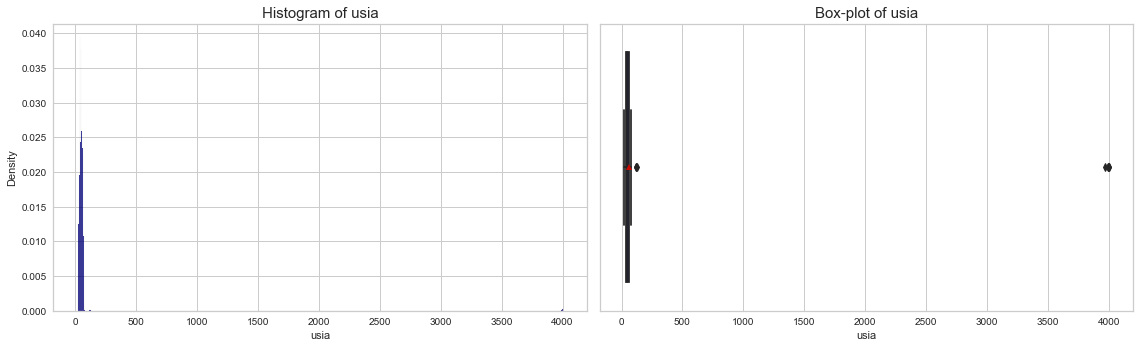

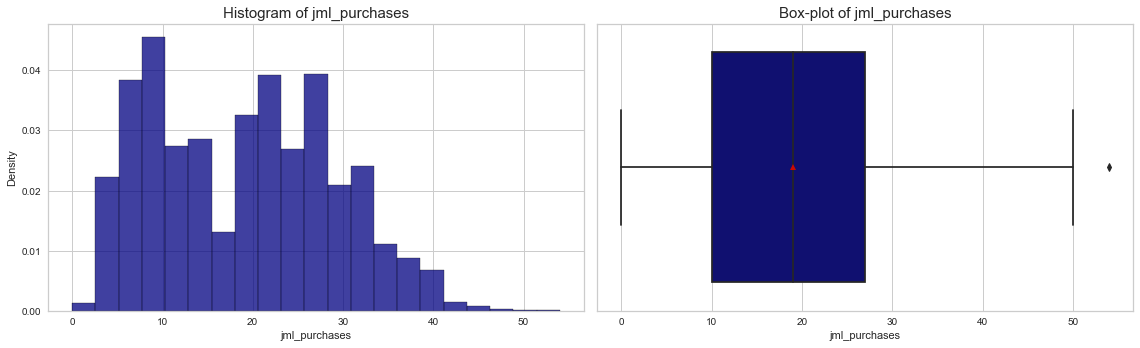

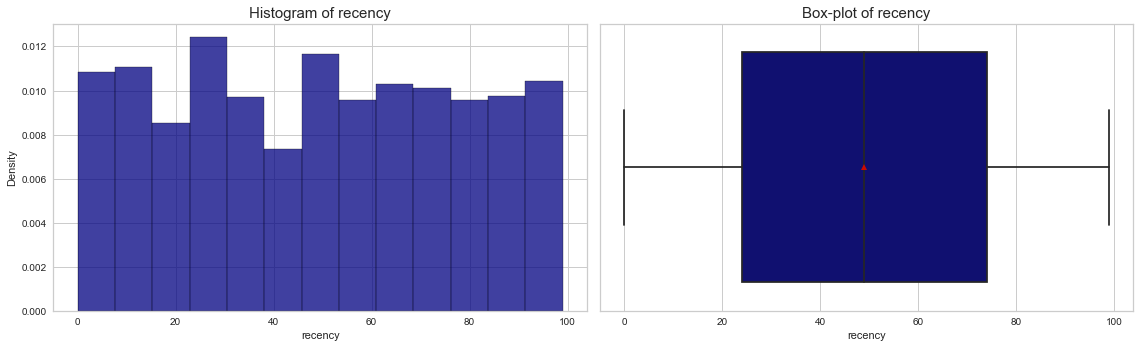

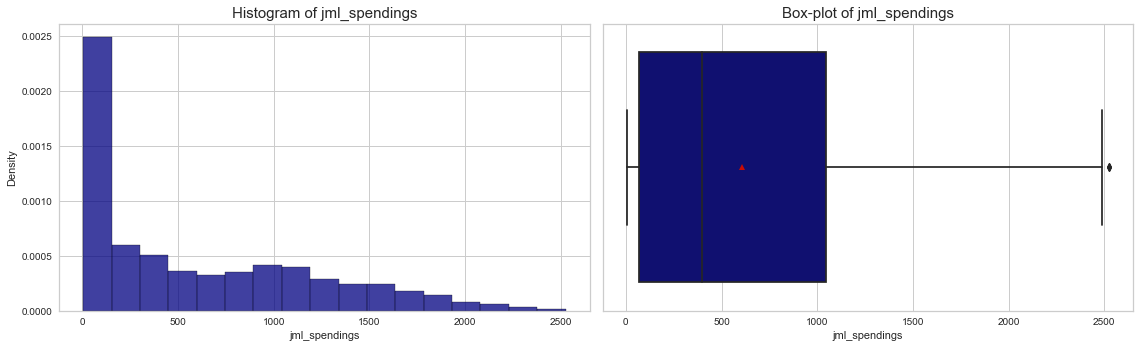

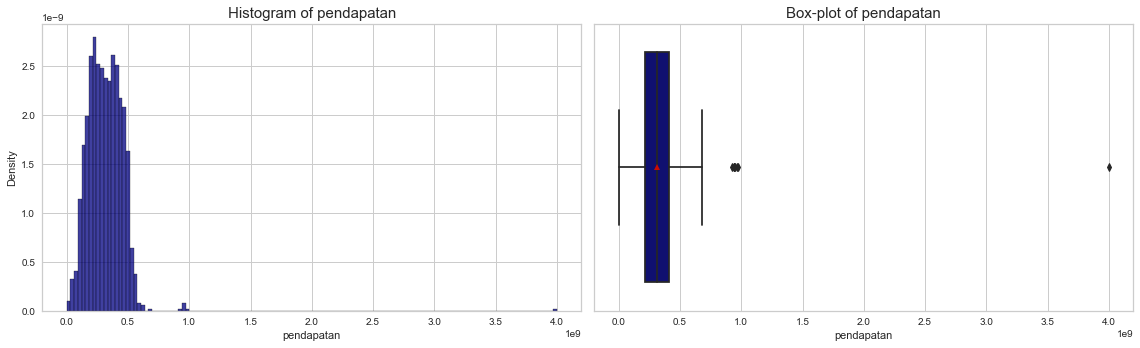

In [9]:
imp_numerical_cols=['usia', 'jml_purchases', 'recency', 'jml_spendings', 'pendapatan']
for i,col in enumerate(imp_numerical_cols):
    text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:#800080'> {col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    bins='auto'
    plt.subplot(1,2,1)
    sns.histplot(data=df_cust,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df_cust,x=col,color='navy',showmeans=True)
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

Observation:
- For usia Distribution, shows that there is outliers, which is age range in 0-4000
- For jml_purchase distribution lies between 0-50, and the majority of customers purchase more than 10 items.
- For recency, the distribution is slightly uniform
- For jml_spendings , the distribution is left skewed and has outliers
- For pendapatan, the distribution is slightly uniform but has outliers

**Bivariate Analysis**

<Figure size 1152x360 with 0 Axes>

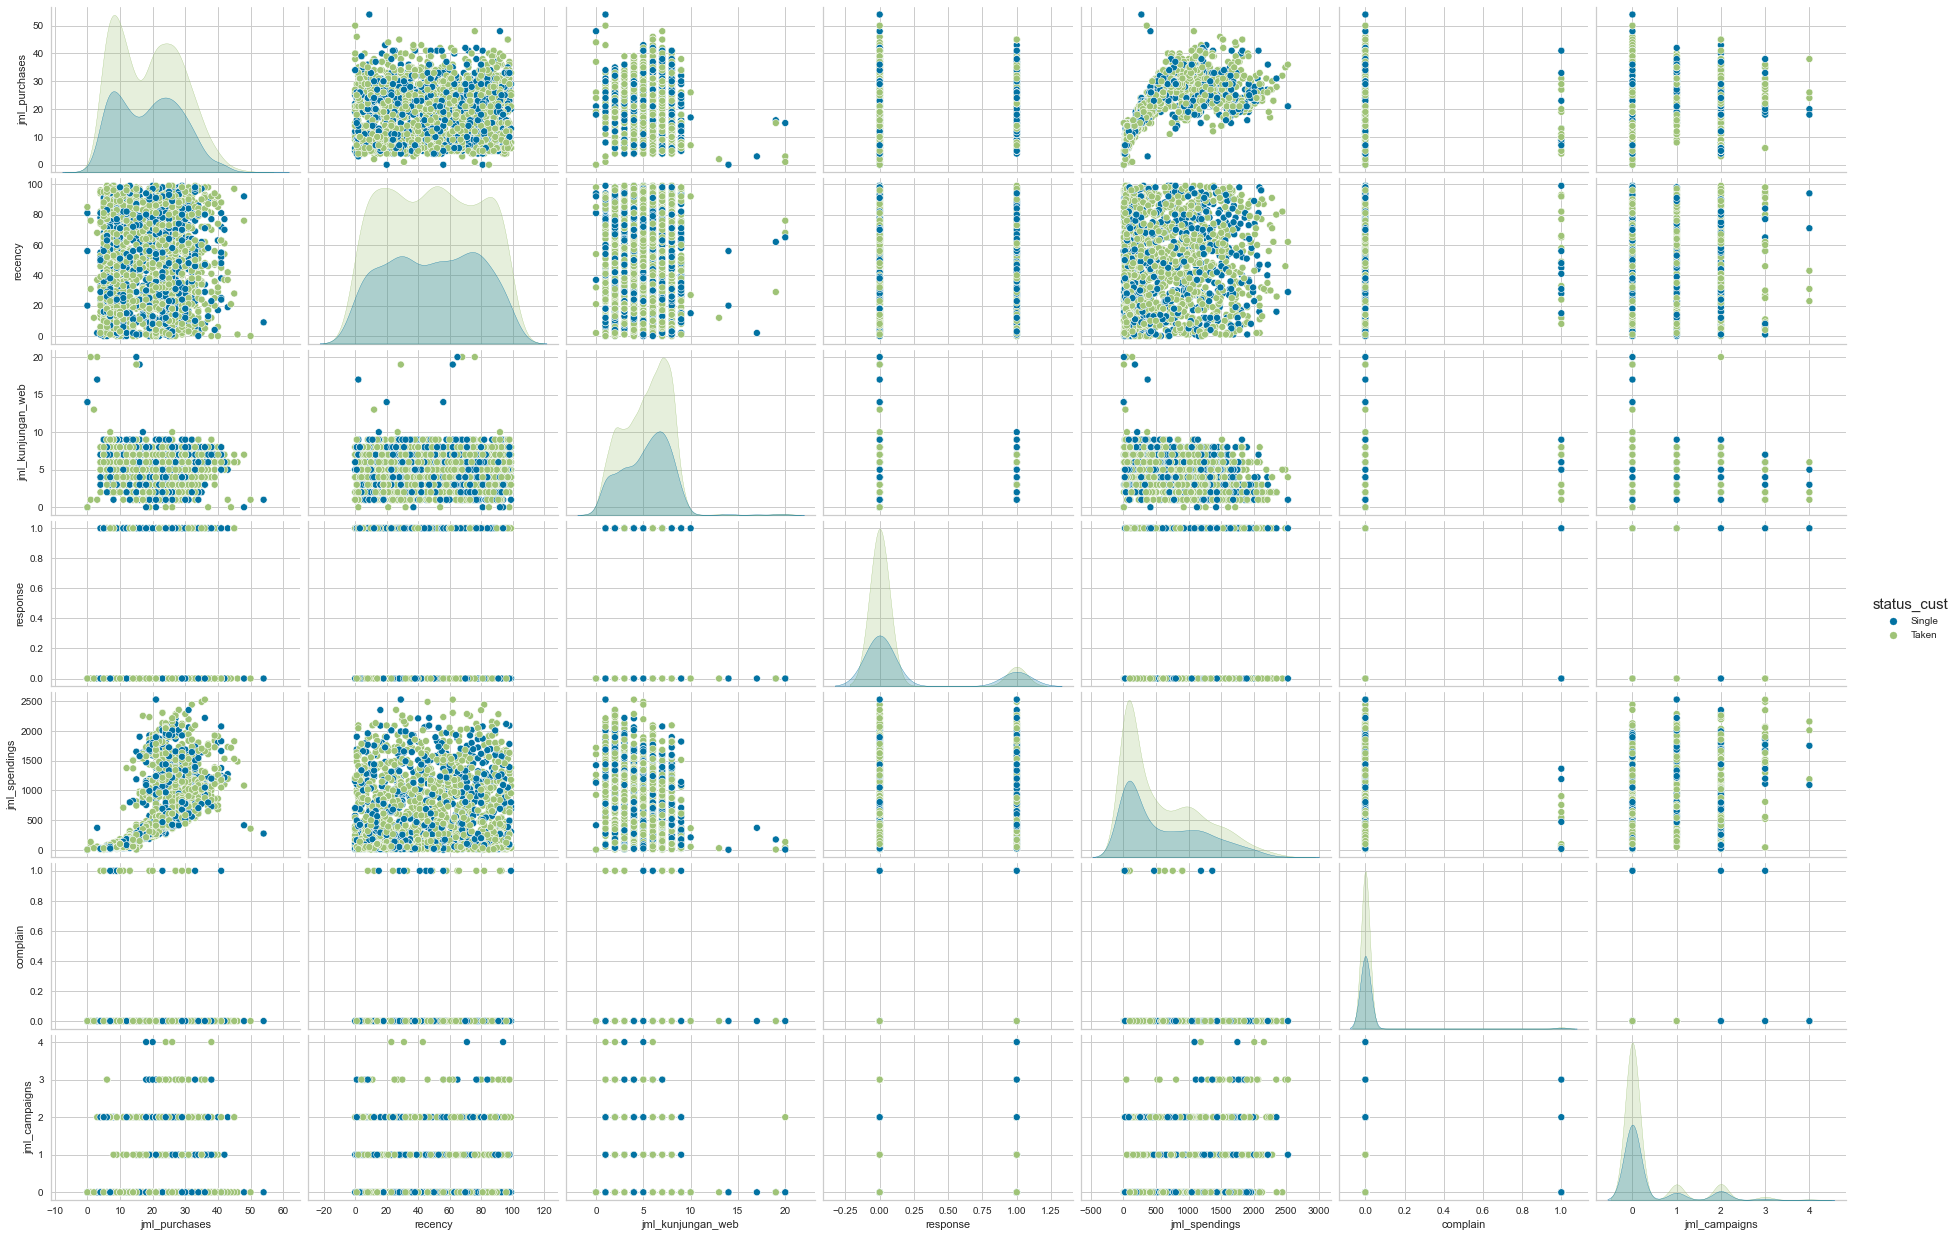

In [10]:
# Checking Association between status and marketing features
plt.figure(figsize=(16,5))
sns.pairplot(df_cust.drop(['jml_anggota_keluarga', 'usia', 'tingkat_pendidikan', 'jml_anak', 'pendapatan', 'id_cust'], axis=1), hue='status_cust', aspect=1.5)
plt.show()

From the above plot we see that marital status seems (status_cust) has correlation with jml_spending, but has no direct relation to marketing features.

<Figure size 504x360 with 0 Axes>

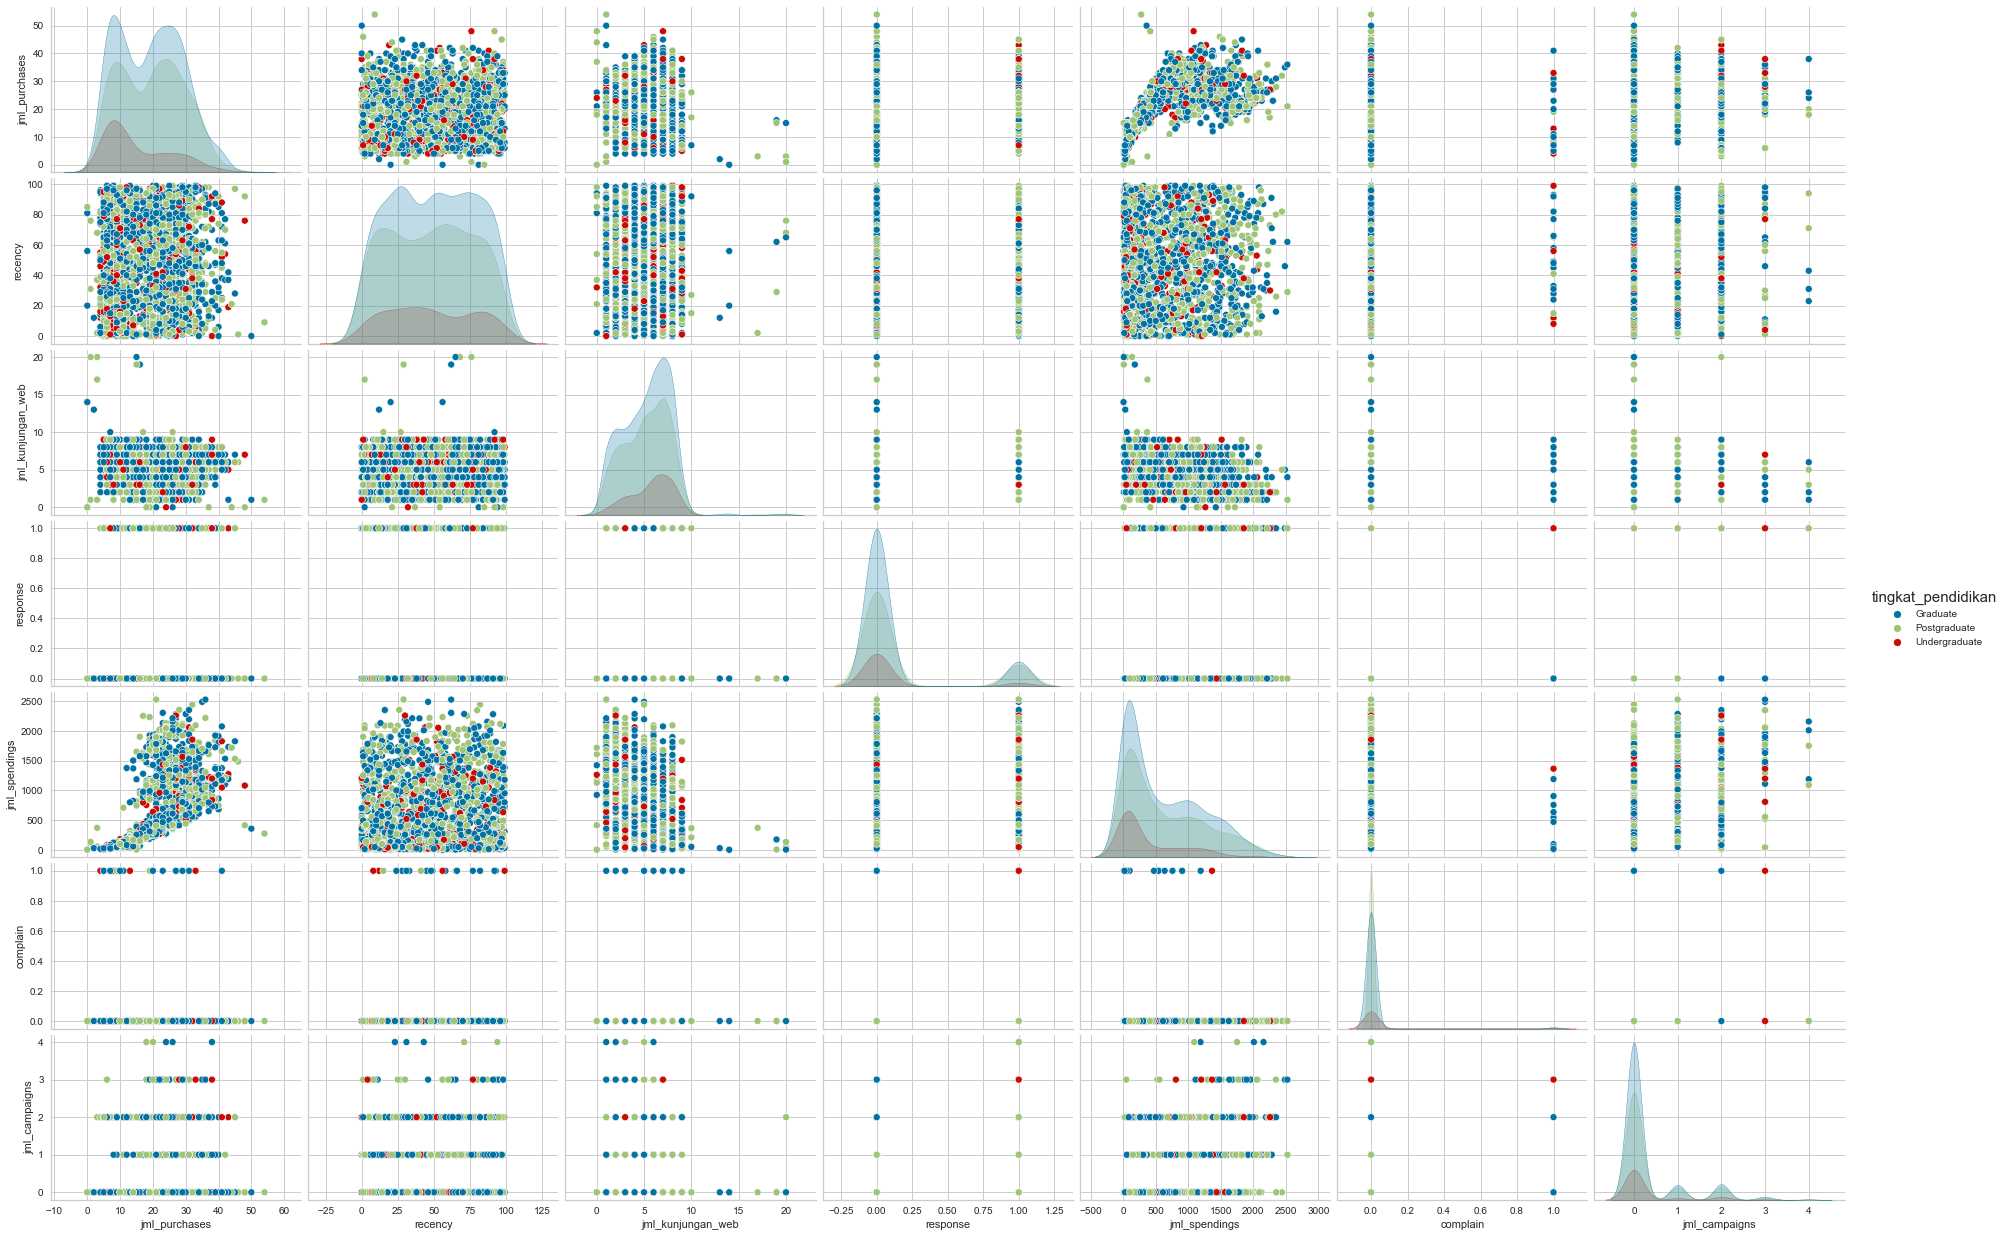

In [11]:
# Checking Association between status and marketing features
plt.figure(figsize=(7,5))
sns.pairplot(df_cust.drop(['jml_anggota_keluarga', 'usia', 'status_cust', 'jml_anak', 'pendapatan', 'id_cust'], axis=1), hue='tingkat_pendidikan', aspect=1.5)
plt.show()

From the above plot we see that education level(tingkat_pendidikan) has correlation with jml_spending and purchases, but has no direct relation to marketing features.

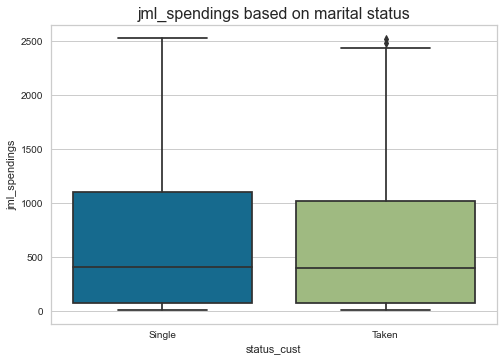

In [12]:
# jml_spendings based on marital status
sns.boxplot(x ='status_cust', y = 'jml_spendings', data=df_cust)
plt.title("jml_spendings based on marital status", fontsize = 16)
plt.show()

Single customers seems have more spendings than who are taken

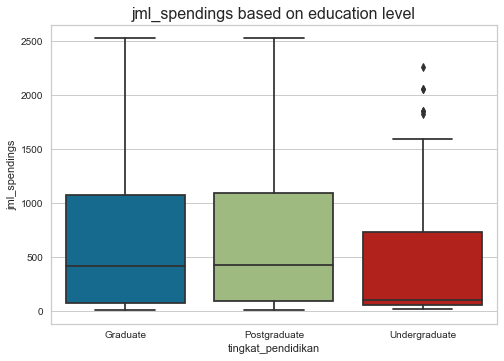

In [13]:
# jml_spendings based on marital status
sns.boxplot(x ='tingkat_pendidikan', y = 'jml_spendings', data=df_cust)
plt.title("jml_spendings based on education level", fontsize = 16)
plt.show()

Customers who are graduate or postgraduate seems have more spending than undergraduate. Since Graduate and Postgraduate have similar distribution, may be in the next this two class need to be convert one type of class only

**Correlation Analysis**

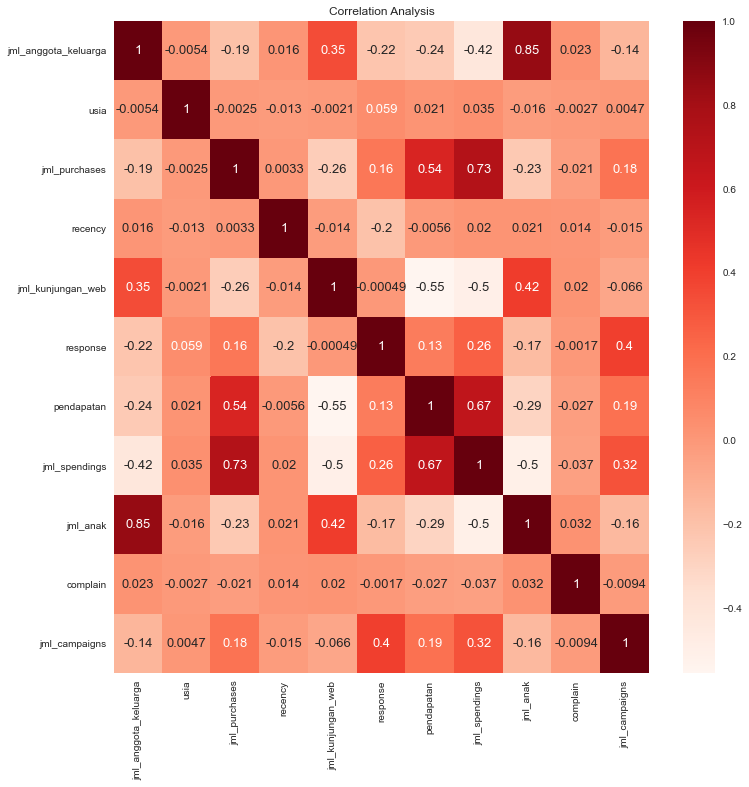

In [14]:
# Analysis correlation in dataset
plt.figure(figsize=(12,12))
cor_df = df_cust.drop(['id_cust'], axis=1)
cor = cor_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 13})
plt.title("Correlation Analysis")
plt.show()

**Observation from correlation analysis**

- feature jml_anggota_keluarga and jml_anak has high correlation, therefore we can remove one of this featuree
- feature usia seems has weak correlation with feature marketing, therefore we can remove usia
- feature complain has weak correlation with feature marketing, therefore we can remove recency

In [15]:
df_cust = df_cust.drop(['jml_anak', 'usia', 'complain'], axis=1)

In [16]:
df_cust.describe()

id_cust  jml_anggota_keluarga  jml_purchases      recency  \
count   2232.000000           2232.000000    2232.000000  2232.000000   
mean    5635.746416              2.591846      18.984767    48.875000   
std     3740.907501              0.906961       9.953849    28.944917   
min        0.000000              1.000000       0.000000     0.000000   
25%     2810.000000              2.000000      10.000000    24.000000   
50%     5458.500000              3.000000      19.000000    49.000000   
75%     8430.500000              3.000000      27.000000    74.000000   
max    90231.000000              5.000000      54.000000    99.000000   

       jml_kunjungan_web     response    pendapatan  jml_spendings  \
count        2232.000000  2232.000000  2.226000e+03    2232.000000   
mean            5.309140     0.149194  3.137541e+08     606.814068   
std             2.427311     0.356359  1.509449e+08     601.460374   
min             0.000000     0.000000  0.000000e+00       5.000000   
25%             3.000000     0.000000  2.123700e+08      69.000000   
50%             6.000000     0.000000  3.084030e+08     397.500000   
75%             7.000000     0.000000  4.115520e+08    1044.250000   
max            20.000000     1.000000  3.999996e+09    2525.000000   

       jml_campaigns  
count    2232.000000  
mean        0.306452  
std         0.708654  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         4.000000

In [17]:
#Label Encoding the object dtypes.
s = (df_cust.dtypes == 'object')
object_cols = list(s[s].index)
LE=LabelEncoder()
for i in object_cols:
    df_cust[i]=df_cust[[i]].apply(LE.fit_transform)


In [48]:
df_cust

id_cust  status_cust  jml_anggota_keluarga  jml_purchases  recency  \
0        5524            0                     1             33       58   
1        2174            0                     3              7       38   
2        4141            1                     2             29       26   
3        6182            1                     3             10       26   
4        5324            1                     3             24       94   
...       ...          ...                   ...            ...      ...   
2227    16987            1                     2             19       18   
2228    16988            1                     4             26       18   
2229    90231            0                     1             30       18   
2230    17287            0                     2             29       70   
2231    16097            1                     3             10       14   

      jml_kunjungan_web  tingkat_pendidikan  response  pendapatan  \
0                     7                   0         1   348828000   
1                     5                   0         0   278064000   
2                     4                   0         0   429678000   
3                     6                   0         0   159876000   
4                     5                   1         0   349758000   
...                 ...                 ...       ...         ...   
2227                  2                   1         0   313754121   
2228                  3                   0         0   313754121   
2229                  1                   0         0   313754121   
2230                  4                   0         0   313754121   
2231                  8                   1         0   313754121   

      jml_spendings  jml_campaigns  Clusters  
0              1617              0         3  
1                27              0         5  
2               776              0         6  
3                53              0         4  
4               422              0         2  
...             ...            ...       ...  
2227            850              0         0  
2228            612              0         2  
2229            778              0         0  
2230            805              0         0  
2231            103              0         4  

[2230 rows x 12 columns]

In [18]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cust               2232 non-null   int64  
 1   status_cust           2232 non-null   int32  
 2   jml_anggota_keluarga  2232 non-null   int64  
 3   jml_purchases         2232 non-null   int64  
 4   recency               2232 non-null   int64  
 5   jml_kunjungan_web     2232 non-null   int64  
 6   tingkat_pendidikan    2232 non-null   int32  
 7   response              2232 non-null   int64  
 8   pendapatan            2226 non-null   float64
 9   jml_spendings         2232 non-null   int64  
 10  jml_campaigns         2232 non-null   int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 174.4 KB


In [19]:
#fill missing values pendapatan with mean
df_cust['pendapatan'] = df_cust['pendapatan'].fillna((df_cust['pendapatan'].mean()))

In [20]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cust               2232 non-null   int64  
 1   status_cust           2232 non-null   int32  
 2   jml_anggota_keluarga  2232 non-null   int64  
 3   jml_purchases         2232 non-null   int64  
 4   recency               2232 non-null   int64  
 5   jml_kunjungan_web     2232 non-null   int64  
 6   tingkat_pendidikan    2232 non-null   int32  
 7   response              2232 non-null   int64  
 8   pendapatan            2232 non-null   float64
 9   jml_spendings         2232 non-null   int64  
 10  jml_campaigns         2232 non-null   int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 174.4 KB


In [21]:
#take out outlier of feature pendapatan which is equal to greater than 1x1e9
df_cust['pendapatan'] = df_cust["pendapatan"].astype(int) # convert from float to integer
df_cust = df_cust[~(df_cust['pendapatan'] >= 1000000000)]

In [22]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2231
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id_cust               2232 non-null   int64
 1   status_cust           2232 non-null   int32
 2   jml_anggota_keluarga  2232 non-null   int64
 3   jml_purchases         2232 non-null   int64
 4   recency               2232 non-null   int64
 5   jml_kunjungan_web     2232 non-null   int64
 6   tingkat_pendidikan    2232 non-null   int32
 7   response              2232 non-null   int64
 8   pendapatan            2232 non-null   int32
 9   jml_spendings         2232 non-null   int64
 10  jml_campaigns         2232 non-null   int64
dtypes: int32(3), int64(8)
memory usage: 183.1 KB


In [23]:
df_cust.describe()

id_cust  status_cust  jml_anggota_keluarga  jml_purchases  \
count   2232.000000  2232.000000           2232.000000    2232.000000   
mean    5635.746416     0.645161              2.591846      18.984767   
std     3740.907501     0.478572              0.906961       9.953849   
min        0.000000     0.000000              1.000000       0.000000   
25%     2810.000000     0.000000              2.000000      10.000000   
50%     5458.500000     1.000000              3.000000      19.000000   
75%     8430.500000     1.000000              3.000000      27.000000   
max    90231.000000     1.000000              5.000000      54.000000   

           recency  jml_kunjungan_web  tingkat_pendidikan     response  \
count  2232.000000        2232.000000         2232.000000  2232.000000   
mean     48.875000           5.309140            0.610215     0.149194   
std      28.944917           2.427311            0.682393     0.356359   
min       0.000000           0.000000            0.000000     0.000000   
25%      24.000000           3.000000            0.000000     0.000000   
50%      49.000000           6.000000            0.000000     0.000000   
75%      74.000000           7.000000            1.000000     0.000000   
max      99.000000          20.000000            2.000000     1.000000   

         pendapatan  jml_spendings  jml_campaigns  
count  2.232000e+03    2232.000000    2232.000000  
mean   3.109999e+08     606.814068       0.306452  
std    1.390685e+08     601.460374       0.708654  
min   -2.147484e+09       5.000000       0.000000  
25%    2.124540e+08      69.000000       0.000000  
50%    3.086730e+08     397.500000       0.000000  
75%    4.108095e+08    1044.250000       0.000000  
max    9.743820e+08    2525.000000       4.000000

In [24]:
#take out outlier of feature pendapatan which is equal to greater than 1x1e9
df_cust = df_cust[~(df_cust['pendapatan'] < 1)]

In [25]:
df_cust.describe()

id_cust  status_cust  jml_anggota_keluarga  jml_purchases  \
count   2230.000000  2230.000000           2230.000000    2230.000000   
mean    5636.397758     0.644843              2.591928      18.991928   
std     3740.069542     0.478668              0.907240       9.955032   
min        0.000000     0.000000              1.000000       0.000000   
25%     2811.750000     0.000000              2.000000      10.000000   
50%     5458.500000     1.000000              3.000000      19.000000   
75%     8429.250000     1.000000              3.000000      27.000000   
max    90231.000000     1.000000              5.000000      54.000000   

           recency  jml_kunjungan_web  tingkat_pendidikan     response  \
count  2230.000000        2230.000000         2230.000000  2230.000000   
mean     48.882063           5.307623            0.609865     0.149327   
std      28.951918           2.427686            0.681941     0.356491   
min       0.000000           0.000000            0.000000     0.000000   
25%      24.000000           3.000000            0.000000     0.000000   
50%      49.000000           6.000000            0.000000     0.000000   
75%      74.000000           7.000000            1.000000     0.000000   
max      99.000000          20.000000            2.000000     1.000000   

         pendapatan  jml_spendings  jml_campaigns  
count  2.230000e+03    2230.000000    2230.000000  
mean   3.122418e+08     607.303139       0.306726  
std    1.288443e+08     601.508200       0.708912  
min    1.038000e+07       5.000000       0.000000  
25%    2.127690e+08      69.000000       0.000000  
50%    3.089910e+08     399.000000       0.000000  
75%    4.108845e+08    1044.750000       0.000000  
max    9.743820e+08    2525.000000       4.000000

**Scaling the features using the standard scaler**

In [26]:
#Creating a copy of data
df_cust2 = df_cust
df_cust2 = df_cust.drop(['id_cust'], axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df_cust2)
scaled_ds = pd.DataFrame(scaler.transform(df_cust2),columns= df_cust2.columns )
print("All features are now scaled")

All features are now scaled


In [27]:
scaled_ds

status_cust  jml_anggota_keluarga  jml_purchases   recency  \
0       -1.347463             -1.755087       1.407450  0.315004   
1       -1.347463              0.449896      -1.204880 -0.375951   
2        0.742135             -0.652596       1.005553 -0.790524   
3        0.742135              0.449896      -0.903457 -0.790524   
4        0.742135              0.449896       0.503182  1.558724   
...           ...                   ...            ...       ...   
2225     0.742135             -0.652596       0.000811 -1.066907   
2226     0.742135              1.552387       0.704131 -1.066907   
2227    -1.347463             -1.755087       1.106028 -1.066907   
2228    -1.347463             -0.652596       1.005553  0.729578   
2229     0.742135              0.449896      -0.903457 -1.205098   

      jml_kunjungan_web  tingkat_pendidikan  response  pendapatan  \
0              0.697271           -0.894508  2.386775    0.284020   
1             -0.126743           -0.894508 -0.418975   -0.265324   
2             -0.538750           -0.894508 -0.418975    0.911663   
3              0.285264           -0.894508 -0.418975   -1.182823   
4             -0.126743            0.572222 -0.418975    0.291240   
...                 ...                 ...       ...         ...   
2225          -1.362765            0.572222 -0.418975    0.011740   
2226          -0.950757           -0.894508 -0.418975    0.011740   
2227          -1.774772           -0.894508 -0.418975    0.011740   
2228          -0.538750           -0.894508 -0.418975    0.011740   
2229           1.109279            0.572222 -0.418975    0.011740   

      jml_spendings  jml_campaigns  
0          1.678985      -0.432769  
1         -0.964963      -0.432769  
2          0.280519      -0.432769  
3         -0.921729      -0.432769  
4         -0.308133      -0.432769  
...             ...            ...  
2225       0.403571      -0.432769  
2226       0.007810      -0.432769  
2227       0.283845      -0.432769  
2228       0.328742      -0.432769  
2229      -0.838586      -0.432769  

[2230 rows x 10 columns]

### CLUSTERING

**1. K-Means**

- Elbow method

Elbow Method to determine the number of clusters to be formed:


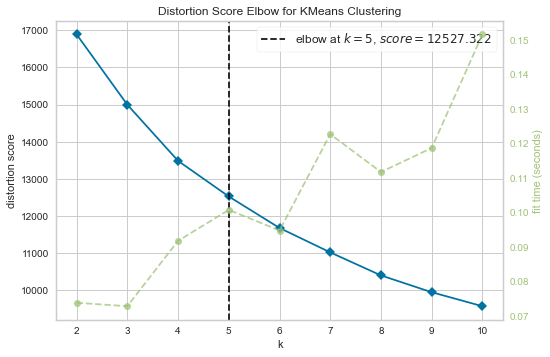

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
k = range(1,10)
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

The above cell indicates that 5 will be an optimal number of clusters for this data.

- Silhouette Score

Silhouette Method to calculate silhouette coefficient and find exact number of k:


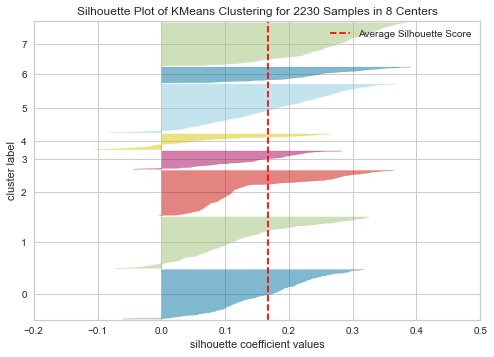

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2230 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
print('Silhouette Method to calculate silhouette coefficient and find exact number of k:')
k = range(1,20)
Silhouette = SilhouetteVisualizer(KMeans(), k=k, colors='yellowbrick')
Silhouette.fit(scaled_ds)
Silhouette.show()

Thus, based on silhouette score with coefficient=0.2 the choice of n_clusters = 8 will be sub-optimal

**With PCA**

In [51]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2230.0  4.221835e-17  1.794646 -4.801936 -1.552180 -0.275652  1.384428   
col2  2230.0 -3.193758e-17  1.229193 -3.308475 -1.008917 -0.177084  0.843369   
col3  2230.0  6.999881e-17  1.144465 -3.038625 -0.744339 -0.066383  0.572580   

           max  
col1  5.183102  
col2  4.202774  
col3  4.410946

In [52]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

PCA Elbow Method to determine the number of clusters to be formed:


C:\Users\Atiah\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


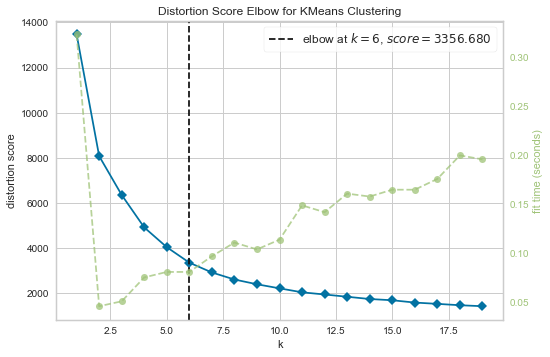

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Quick examination of elbow method to find numbers of clusters to make.
k = range(1,20)
print('PCA Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=k)
Elbow_M.fit(PCA_ds)

Elbow_M.show()

The above cell indicates that 6 will be an optimal number of clusters for this data and with pca, SSE is smaller.

PCA Silhouette Method to calculate silhouette coefficient and find exact number of k:


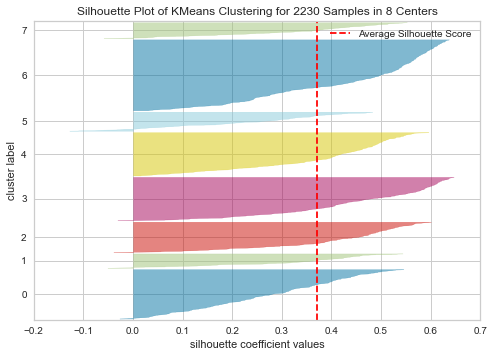

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2230 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
print('PCA Silhouette Method to calculate silhouette coefficient and find exact number of k:')
k = range(1,20)
Silhouette = SilhouetteVisualizer(KMeans(), k=k, colors='yellowbrick')
Silhouette.fit(PCA_ds)
Silhouette.show()

Based on silhouette score, PCA result yield coefficient=0.4 the choice of n_clusters = 8 will be sub-optimal

In [34]:
scaled_ds

status_cust  jml_anggota_keluarga  jml_purchases   recency  \
0       -1.347463             -1.755087       1.407450  0.315004   
1       -1.347463              0.449896      -1.204880 -0.375951   
2        0.742135             -0.652596       1.005553 -0.790524   
3        0.742135              0.449896      -0.903457 -0.790524   
4        0.742135              0.449896       0.503182  1.558724   
...           ...                   ...            ...       ...   
2225     0.742135             -0.652596       0.000811 -1.066907   
2226     0.742135              1.552387       0.704131 -1.066907   
2227    -1.347463             -1.755087       1.106028 -1.066907   
2228    -1.347463             -0.652596       1.005553  0.729578   
2229     0.742135              0.449896      -0.903457 -1.205098   

      jml_kunjungan_web  tingkat_pendidikan  response  pendapatan  \
0              0.697271           -0.894508  2.386775    0.284020   
1             -0.126743           -0.894508 -0.418975   -0.265324   
2             -0.538750           -0.894508 -0.418975    0.911663   
3              0.285264           -0.894508 -0.418975   -1.182823   
4             -0.126743            0.572222 -0.418975    0.291240   
...                 ...                 ...       ...         ...   
2225          -1.362765            0.572222 -0.418975    0.011740   
2226          -0.950757           -0.894508 -0.418975    0.011740   
2227          -1.774772           -0.894508 -0.418975    0.011740   
2228          -0.538750           -0.894508 -0.418975    0.011740   
2229           1.109279            0.572222 -0.418975    0.011740   

      jml_spendings  jml_campaigns  
0          1.678985      -0.432769  
1         -0.964963      -0.432769  
2          0.280519      -0.432769  
3         -0.921729      -0.432769  
4         -0.308133      -0.432769  
...             ...            ...  
2225       0.403571      -0.432769  
2226       0.007810      -0.432769  
2227       0.283845      -0.432769  
2228       0.328742      -0.432769  
2229      -0.838586      -0.432769  

[2230 rows x 10 columns]

**Agglomerating Clustering**

In [35]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=8)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_cust["Clusters"]= yhat_AC

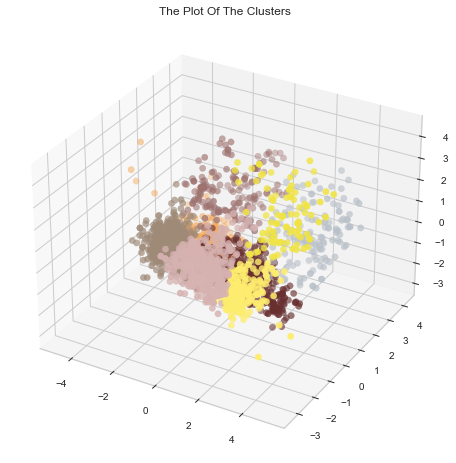

In [36]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60", "#FEED6F", "#F0E442"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

### Evaluation Model

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

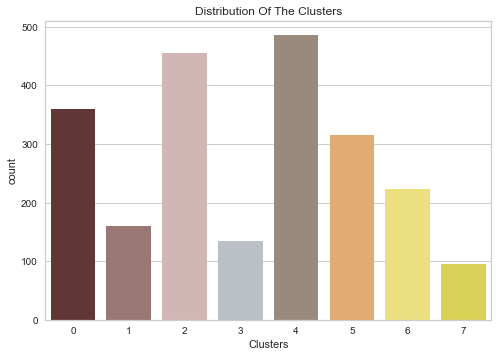

In [37]:
#Plotting countplot of clusters
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60", "#FEED6F", "#F0E442"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

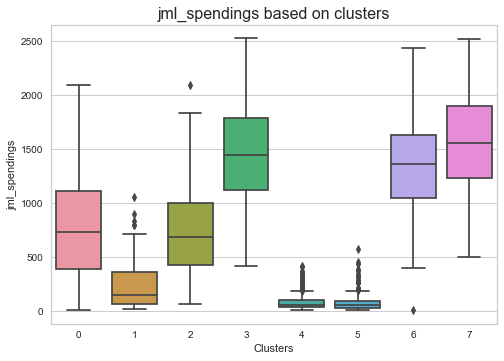

In [38]:
# jml_spendings based on marital status
sns.boxplot(x ='Clusters', y = 'jml_spendings', data=df_cust)
plt.title("jml_spendings based on clusters", fontsize = 16)
plt.show()

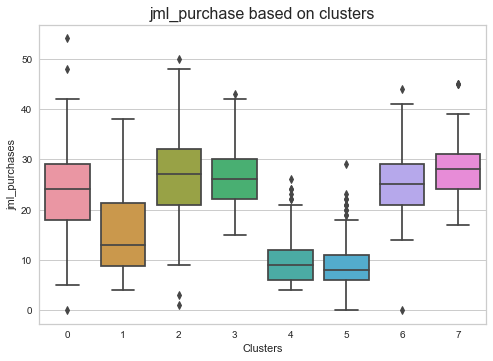

In [39]:
# jml_spendings based on marital status
sns.boxplot(x ='Clusters', y = 'jml_purchases', data=df_cust)
plt.title("jml_purchase based on clusters", fontsize = 16)
plt.show()

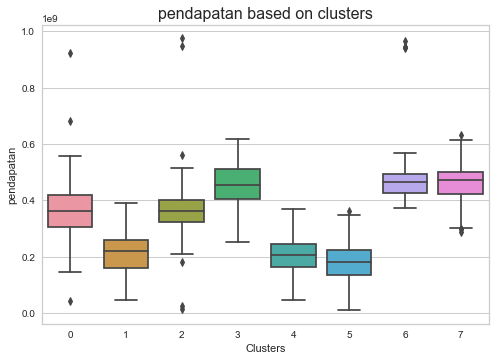

In [40]:
# jml_spendings based on marital status
sns.boxplot(x ='Clusters', y = 'pendapatan', data=df_cust)
plt.title("pendapatan based on clusters", fontsize = 16)
plt.show()

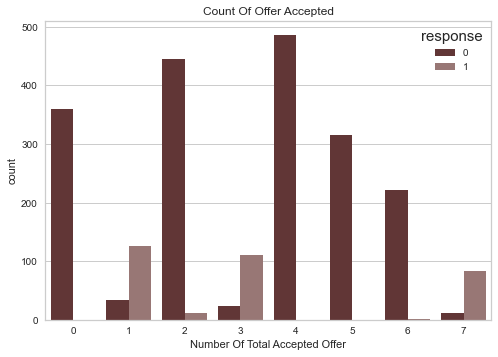

In [41]:
#Accepted offer 
plt.figure()
pl = sns.countplot(x='Clusters',hue='response',data=df_cust, palette= pal)
pl.set_title("Count Of Offer Accepted")
pl.set_xlabel("Number Of Total Accepted Offer")
plt.show()

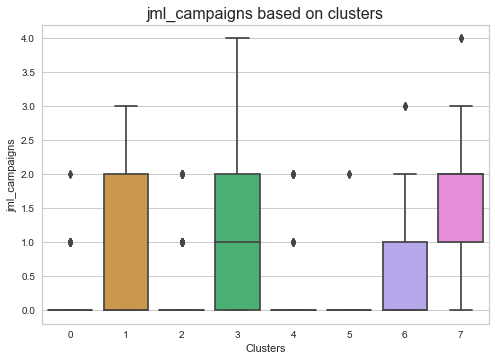

In [42]:
# jml_spendings based on marital status
sns.boxplot(x ='Clusters', y = 'jml_campaigns', data=df_cust)
plt.title("jml_campaigns based on clusters", fontsize = 16)
plt.show()

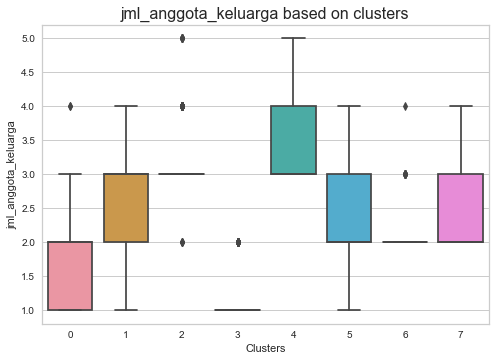

In [43]:
# jml_spendings based on marital status
sns.boxplot(x ='Clusters', y = 'jml_anggota_keluarga', data=df_cust)
plt.title("jml_anggota_keluarga based on clusters", fontsize = 16)
plt.show()

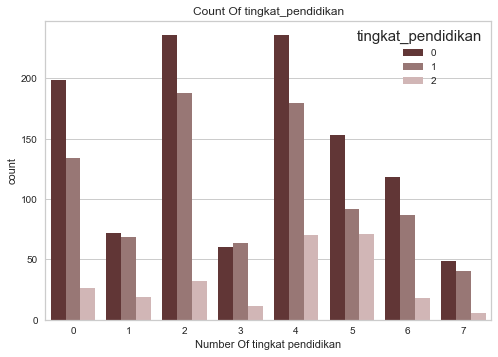

In [44]:
#Accepted offer 
plt.figure()
pl = sns.countplot(x='Clusters',hue='tingkat_pendidikan',data=df_cust, palette= pal)
pl.set_title("Count Of tingkat_pendidikan")
pl.set_xlabel("Number Of tingkat pendidikan")
plt.show()

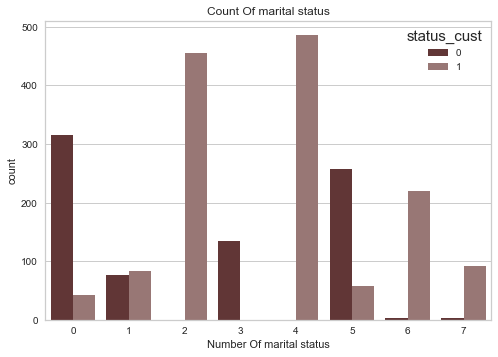

In [45]:
#Accepted offer 
plt.figure()
pl = sns.countplot(x='Clusters',hue='status_cust',data=df_cust, palette= pal)
pl.set_title("Count Of marital status")
pl.set_xlabel("Number Of marital status")
plt.show()

In [46]:
- cluster 0 : has average spending , high purchase, average pendapatan, no offer accepted , no campaign accepted, has smaller family size, higher graduate, single
- cluster 1 : has lower spending, lower purchase, lower pendapatan, higher accepted offer, higher accepted campaign, average family size, higher graduate, single and taken fairly distributed
- cluster 2 : has average spending, high purchase, average pendapatan, higher accepted offer, average family size (3), higher accepted campaign, higher graduate, taken
- cluster 3 : has high spending, high purchase, high pendapatan, higher accepted offer, higher accepted campaign, smaller family size, graduate, single
- cluster 4 : has high spending, low purchase, low pendapatan, higher accepted offer, no campaign accepted, bigger family size, graduate, taken
- Cluster 5 : has low spending, low purchase, low pendapatan, higher accepted offer, no campaign accepted, average famly size, graduate, single
- Cluster 6 : has low spending, high purchase, high pendapatan, low accepted offer, no campaign accepted, big family size, taken
- Cluster 7 : has high spending, high purchase, high pendapatan, higher accepted offer, higher campaign accepted, bigger family size, graduate, taken

SyntaxError: invalid syntax (<ipython-input-46-0e14de84790a>, line 1)

In [47]:
df_cust.to_csv("df_cust_cluster.csv")